In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location","Date"], axis = 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [7]:
df = df.dropna(axis = 0)
df.shape

(112925, 17)

In [9]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for modelling: '+ str(data.shape))
print('Unseen data for Predictions: '+ str(data_unseen.shape))

Data for modelling: (107279, 17)
Unseen data for Predictions: (5646, 17)


In [12]:
from pycaret.classification import *

In [13]:
exp_clf101 = setup(data = data, target = 'RainTomorrow', session_id = 123)

,Description,Value
0,session_id,123
1,Target,RainTomorrow
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(107279, 17)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8552,0.8849,0.5365,0.7455,0.6239,0.5372,0.5484,1.2860
rf,Random Forest Classifier,0.8535,0.8819,0.5014,0.7629,0.6050,0.5198,0.5371,12.1810
gbc,Gradient Boosting Classifier,0.8514,0.8747,0.5099,0.7462,0.6057,0.5182,0.5325,19.0860
et,Extra Trees Classifier,0.8510,0.8781,0.4783,0.7688,0.5896,0.5046,0.5258,15.0050
lr,Logistic Regression,0.8477,0.8671,0.5052,0.7317,0.5976,0.5075,0.5209,12.7410
lda,Linear Discriminant Analysis,0.8472,0.8702,0.5210,0.7192,0.6042,0.5125,0.5228,1.3470
ridge,Ridge Classifier,0.8462,0.0000,0.4585,0.7590,0.5715,0.4847,0.5076,0.2220
ada,Ada Boost Classifier,0.8456,0.8643,0.4982,0.7258,0.5908,0.4997,0.5131,4.5190
knn,K Neighbors Classifier,0.8368,0.8187,0.5073,0.6822,0.5818,0.4832,0.4914,21.0810
dt,Decision Tree Classifier,0.7893,0.7005,0.5397,0.5288,0.5342,0.3981,0.3981,1.4030


In [15]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [16]:
# LGBMClassifier
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8559,0.8846,0.5407,0.7457,0.6269,0.5404,0.5511
1,0.8527,0.8877,0.5300,0.7382,0.6170,0.5289,0.5400
2,0.8609,0.8895,0.5467,0.7646,0.6375,0.5544,0.5663
3,0.8581,0.8848,0.5455,0.7523,0.6324,0.5472,0.5581
4,0.8539,0.8821,0.5342,0.7409,0.6208,0.5333,0.5442
5,0.8539,0.8834,0.5571,0.7261,0.6305,0.5414,0.5488
6,0.8556,0.8843,0.5351,0.7479,0.6239,0.5376,0.5491
7,0.8500,0.8845,0.5232,0.7301,0.6096,0.5199,0.5309
8,0.8591,0.8849,0.5315,0.7672,0.6280,0.5446,0.5585
9,0.8522,0.8835,0.5211,0.7417,0.6122,0.5243,0.5367


In [17]:
# random forest classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.8806,0.4967,0.7584,0.6003,0.5142,0.5316
1,0.8519,0.8832,0.4949,0.7598,0.5994,0.5135,0.5313
2,0.8554,0.8875,0.4973,0.7762,0.6062,0.5228,0.5423
3,0.8574,0.8808,0.5086,0.7773,0.6149,0.5320,0.5500
4,0.8535,0.8826,0.5027,0.7619,0.6057,0.5204,0.5374
5,0.8530,0.8819,0.5190,0.7466,0.6124,0.5252,0.5384
6,0.8532,0.8794,0.5071,0.7567,0.6073,0.5213,0.5371
7,0.8528,0.8834,0.5024,0.7583,0.6044,0.5185,0.5351
8,0.8575,0.8811,0.5030,0.7824,0.6123,0.5300,0.5495
9,0.8483,0.8788,0.4825,0.7509,0.5875,0.4999,0.5183


In [18]:
# logistic regression 
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8478,0.8694,0.4991,0.7360,0.5948,0.5053,0.5198
1,0.8437,0.8687,0.4961,0.7183,0.5869,0.4945,0.5073
2,0.8522,0.8738,0.5181,0.7438,0.6108,0.5232,0.5362
3,0.8554,0.8734,0.5265,0.7532,0.6197,0.5339,0.5470
4,0.8461,0.8603,0.4973,0.7289,0.5912,0.5005,0.5144
5,0.8445,0.8633,0.5202,0.7071,0.5995,0.5057,0.5149
6,0.8484,0.8662,0.5042,0.7352,0.5982,0.5087,0.5225
7,0.8431,0.8629,0.5060,0.7095,0.5907,0.4970,0.5079
8,0.8503,0.8662,0.4917,0.7536,0.5951,0.5082,0.5257
9,0.8459,0.8668,0.4926,0.7314,0.5887,0.4983,0.5131


In [19]:
# Light Gradient Boosting Machine is the best classifier by accuracy parameter
# tuned model
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8547,0.8873,0.5390,0.7414,0.6242,0.5369,0.5474
1,0.8565,0.8877,0.5437,0.7461,0.6290,0.5428,0.5532
2,0.8605,0.8904,0.5526,0.7584,0.6394,0.5555,0.5662
3,0.8594,0.8874,0.5461,0.7581,0.6349,0.5506,0.5620
4,0.8543,0.8826,0.5396,0.7392,0.6238,0.5362,0.5464
5,0.8532,0.8832,0.5488,0.7283,0.6259,0.5369,0.5452
6,0.8562,0.8830,0.5393,0.7475,0.6266,0.5404,0.5514
7,0.8515,0.8862,0.5333,0.7302,0.6164,0.5271,0.5371
8,0.8616,0.8873,0.5393,0.7737,0.6356,0.5535,0.5672
9,0.8512,0.8840,0.5164,0.7406,0.6085,0.5202,0.5331


In [20]:
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


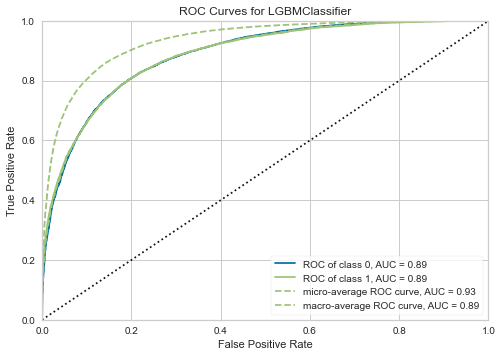

In [21]:
# area under curve
plot_model(tuned_lightgbm, plot ='auc')

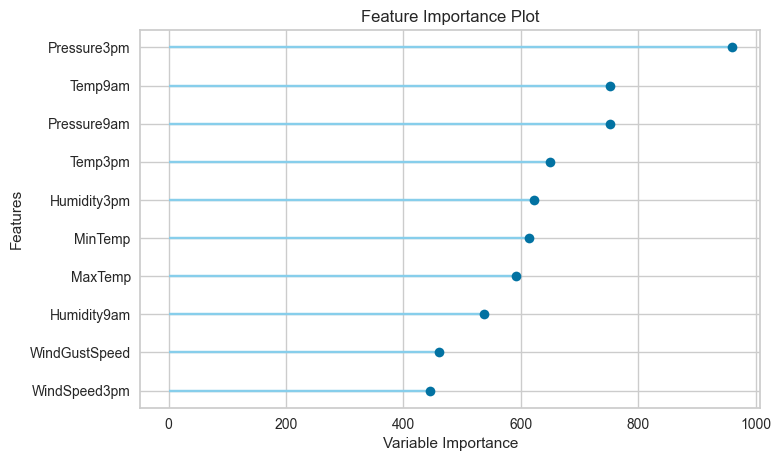

In [22]:
# feature importance
plot_model(tuned_lightgbm, plot ='feature')

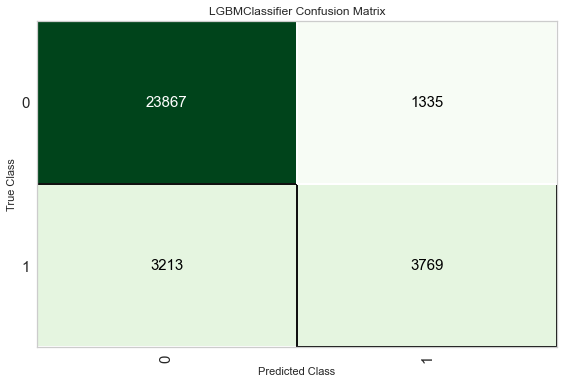

In [23]:
# confusuin matrix
plot_model(tuned_lightgbm, plot ='confusion_matrix')

In [24]:
# finalize_model
final_lightgbm = finalize_model(tuned_lightgbm)

In [25]:
predict_model(final_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8773,0.9164,0.5859,0.7947,0.6745,0.6011,0.6117


In [26]:
# predict on unseen data
unseen_predictions = predict_model(final_lightgbm,data=data_unseen)
unseen_predictions.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Label,Score
0,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No,No,0.8941
1,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,Yes,Yes,0.9798
2,18.5,38.2,0.0,NNE,31.0,SE,NNW,9.0,17.0,48.0,25.0,1017.8,1014.1,25.8,36.2,No,No,No,0.9898
3,22.3,42.9,0.0,NNE,28.0,ESE,SE,9.0,11.0,37.0,11.0,1014.6,1010.2,29.2,41.2,No,No,No,0.9922
4,12.5,28.8,0.0,N,31.0,SSE,ENE,7.0,11.0,46.0,17.0,1017.2,1013.5,18.0,27.0,No,No,No,0.9804


In [29]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['RainTomorrow'], unseen_predictions['Label'], metric = 'Accuracy')

0.8526

In [31]:
# saving the model
save_model(final_lightgbm,'Final rain_predicion model 4-17-21')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='RainTomorrow',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
       